In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import re
symbols = ['0P0000GB48.BO','0P0000XVAE.BO']

# Scraping the Data 

In [3]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

def scrape_yahoo_finance_data(symbol):
    """
    Scrape data from Yahoo Finance for the given symbol.

    Args:
    - symbol: The symbol to fetch data for.

    Returns:
    - List of dictionaries containing scraped data.
    """
    # Fetching the webpage content
    r = requests.get(f"https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/{symbol}?p={symbol}").text
    soup = BeautifulSoup(r, 'html.parser')
    alldata = soup.find_all("tbody")

    try:
        table1 = alldata[0].find_all("tr")
    except:
        table1 = None
    try:
        table2 = alldata[1].find_all("tr")
    except:
        table2 = None

    u = []

    for table in [table1, table2]:
        if table:
            data = {}
            for row in table:
                try:
                    table_td = row.find_all("td")
                    data[table_td[0].text] = table_td[1].text
                except:
                    pass
            u.append(data)

    return u

def main():
    for symbol in symbols:
        scraped_data = scrape_yahoo_finance_data(symbol)
        pprint(scraped_data)

if __name__ == "__main__":
    main()


[{'Category': 'N/A',
  'Expense Ratio (net)': '1.87%',
  'Last Cap Gain': 'N/A',
  'Morningstar Rating': '★★★★★',
  'Morningstar Risk Rating': 'Below Average',
  'Previous Close': '94.47',
  'Sustainability Rating': '',
  'YTD Return': '3.05%'},
 {'5y Average Return': 'N/A',
  'Average for Category': 'N/A',
  'Beta (5Y Monthly)': '0.88',
  'Holdings Turnover': '27.00%',
  'Inception Date': 'May 23, 2008',
  'Last Dividend': 'N/A',
  'Net Assets': '2.14B',
  'Yield': '0.00%'}]
[{'Category': 'N/A',
  'Expense Ratio (net)': '1.92%',
  'Last Cap Gain': 'N/A',
  'Morningstar Rating': '★★★★★',
  'Morningstar Risk Rating': 'Above Average',
  'Previous Close': '300.93',
  'Sustainability Rating': 'N/A',
  'YTD Return': '3.15%'},
 {'5y Average Return': 'N/A',
  'Average for Category': 'N/A',
  'Beta (5Y Monthly)': '0.98',
  'Holdings Turnover': '2.47%',
  'Inception Date': 'Jun 25, 1999',
  'Last Dividend': 'N/A',
  'Net Assets': '32.05B',
  'Yield': '0.00%'}]


# Fund Performance 

[*********************100%%**********************]  1 of 1 completed


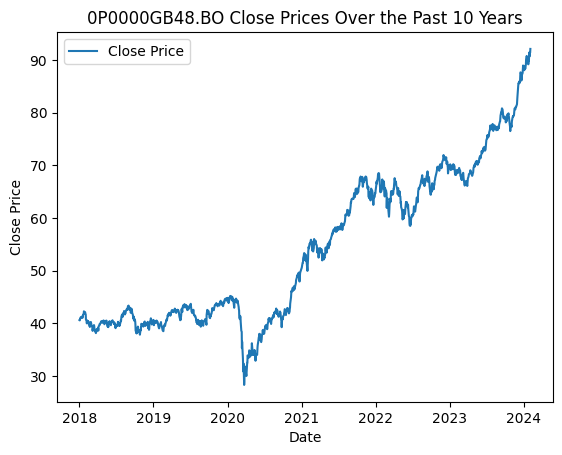

The 10-year CAGR for 0P0000GB48.BO is 0.05%


[*********************100%%**********************]  1 of 1 completed


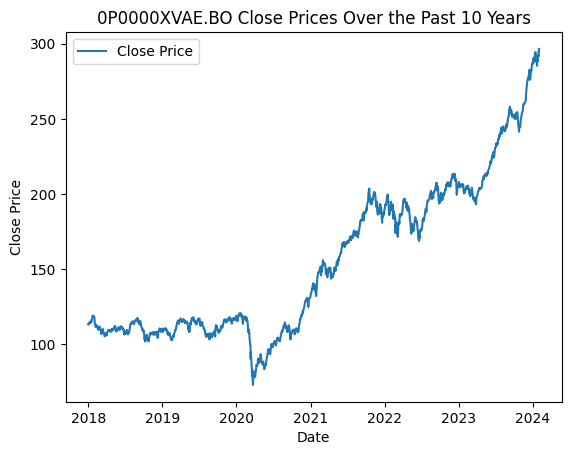

The 10-year CAGR for 0P0000XVAE.BO is 0.06%


In [4]:
def calculate_cagr(data):
    """
    Calculate the Compound Annual Growth Rate (CAGR) for the given data.

    Args:
    - data: DataFrame containing historical market data.

    Returns:
    - The calculated CAGR if data is not empty, else returns None.
    """
    if data.empty:
        print("Data is empty. Unable to calculate CAGR.")
        return None

    cagr = (np.prod(data['Close'].iloc[-1] / data['Close'].iloc[0]) ** (1/len(data))) - 1
    return cagr

def main():
    for symbol in symbols:
        # Fetch historical market data
        data = yf.download(symbol, start="2014-02-04", end="2024-02-04")

        # Calculate the CAGR
        cagr = calculate_cagr(data)

        # Plot close prices and show CAGR
        if cagr is not None:
            sns.lineplot(x=data.index, y=data['Close'], label='Close Price')
            plt.title(f'{symbol} Close Prices Over the Past 10 Years')
            plt.xlabel('Date')
            plt.ylabel('Close Price')
            plt.show()

            print(f'The 10-year CAGR for {symbol} is {cagr*100:.2f}%')

if __name__ == "__main__":
    main()


# Comparing Fund to Benchmark

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


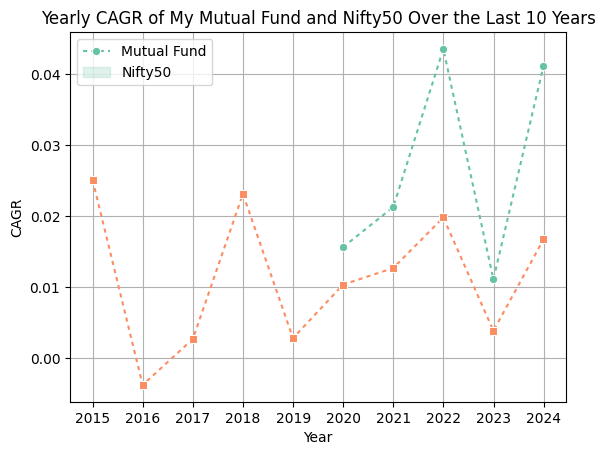

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


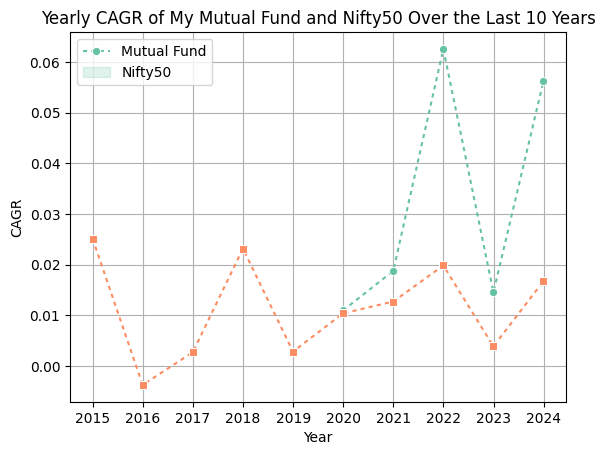

In [5]:
def get_historical_data(mutual_fund_ticker, nifty50_ticker):
    """Get historical data for the mutual fund and Nifty50."""
    mutual_fund_data = yf.download(mutual_fund_ticker, start="2013-01-01", end="2024-01-01")
    nifty50_data = yf.download(nifty50_ticker, start="2013-01-01", end="2024-01-01")
    return mutual_fund_data, nifty50_data

def resample_data_to_yearly(mutual_fund_data, nifty50_data):
    """Resample the data to yearly data."""
    mutual_fund_data_yearly = mutual_fund_data.resample('A').last()
    nifty50_data_yearly = nifty50_data.resample('A').last()
    return mutual_fund_data_yearly, nifty50_data_yearly

def calculate_cagr(mutual_fund_data_yearly, nifty50_data_yearly):
    """Calculate the CAGR for each year."""
    mutual_fund_cagr = (mutual_fund_data_yearly['Close'] / mutual_fund_data_yearly['Close'].shift(1)) ** (1/len(mutual_fund_data_yearly)) - 1
    nifty50_cagr = (nifty50_data_yearly['Close'] / nifty50_data_yearly['Close'].shift(1)) ** (1/len(nifty50_data_yearly)) - 1
    return mutual_fund_cagr, nifty50_cagr

def plot_cagr(mutual_fund_cagr, nifty50_cagr):
    """Plot the CAGR data."""
    cagr_data = pd.concat([mutual_fund_cagr, nifty50_cagr], axis=1)
    cagr_data.columns = ['Mutual Fund', 'Nifty50']
    
    ax = sns.lineplot(data=cagr_data, dashes=[(2, 2), (2, 2)], markers=["o", "s"], palette='Set2')
    plt.title('Yearly CAGR of My Mutual Fund and Nifty50 Over the Last 10 Years')
    plt.xlabel('Year')
    plt.ylabel('CAGR')
    plt.legend(['Mutual Fund', 'Nifty50'])
    plt.grid(True)
    
    plt.show()

def main():
    for mutual_fund_ticker in symbols:
        nifty50_ticker = '^NSEI'  # Ticker symbol for Nifty50
        
        mutual_fund_data, nifty50_data = get_historical_data(mutual_fund_ticker, nifty50_ticker)
        mutual_fund_data_yearly, nifty50_data_yearly = resample_data_to_yearly(mutual_fund_data, nifty50_data)
        mutual_fund_cagr, nifty50_cagr = calculate_cagr(mutual_fund_data_yearly, nifty50_data_yearly)
        plot_cagr(mutual_fund_cagr, nifty50_cagr)

if __name__ == "__main__":
    main()



# Investment Holdings

In [3]:

# Fetching the webpage content
for symbol in symbols:
    r = requests.get(f"https://api.scrapingdog.com/scrape?api_key=65ce0b5105a58655cf7c2cab&url=https://finance.yahoo.com/quote/{symbol}/holdings").text
    soup = BeautifulSoup(r, 'html.parser')

    # Find the tbody element
    tbody_element = soup.find("tbody")

    # Initialize a list to store the text of tr elements with a specific class
    tr_texts = []

    # Extracting tr elements with a specific class from the tbody, if found
    if tbody_element:
        # Find all tr elements within the tbody
        tr_elements = tbody_element.find_all("tr")
        
        # Extract text from each tr element and store in the list
        for tr in tr_elements:
            # Split the text content by newline character and join with proper spacing
            tr_text = " ".join(tr.text.strip().split("\n"))
            tr_texts.append(tr_text)  # Remove any leading/trailing whitespaces

# Print the properly spaced output
for text in tr_texts:
    print(text)


# Top 10 funds

In [6]:
def fetch_webpage_content(url):
    """Fetches the webpage content."""
    r = requests.get(url).text
    return r

def extract_tr_elements(html_content):
    """Extracts tr elements from the webpage content."""
    soup = BeautifulSoup(html_content, 'html.parser')
    tbody_element = soup.find("tbody")
    tr_texts = []

    if tbody_element:
        tr_elements = tbody_element.find_all("tr")
        for tr in tr_elements:
            tr_text = " ".join(tr.text.strip().split("\n"))
            tr_texts.append(tr_text)

    return tr_texts

def extract_top_funds(tr_texts):
    """Extracts the top 10 large cap funds."""
    pattern = r'^([^-\d]+).*?(\d+\.\d+%)(?=\s*$)'
    matches = []
    fund_names = []

    for item in tr_texts:
        match = re.search(pattern, item)
        if match:
            fund_name = match.group(1).strip()
            matches.append((fund_name, match.group(2)))
            fund_names.append(fund_name)

    sorted_matches = sorted(matches, key=lambda x: float(x[1][:-1]), reverse=True)
    top_funds = [fund_name for fund_name, _ in sorted_matches[:10]]

    return sorted_matches, top_funds

def print_top_funds(sorted_matches):
    """Prints the top 10 large cap funds."""
    print("Top 10 Large Cap Funds:")
    for index, (fund_name, last_percentage) in enumerate(sorted_matches[:10], start=1):
        print(f"{index}. {fund_name.strip()} : {last_percentage}")

def main():
    url = "https://www.moneycontrol.com/mutual-funds/performance-tracker/returns/large-cap-fund.html"
    html_content = fetch_webpage_content(url)
    tr_texts = extract_tr_elements(html_content)
    sorted_matches, top_funds = extract_top_funds(tr_texts)
    print_top_funds(sorted_matches)

    print("\nList of Top Funds:")
    print(top_funds)

if __name__ == "__main__":
    main()


Top 10 Large Cap Funds:
1. Nippon India Large Cap Fund : 18.93%
2. Baroda BNP Paribas Large Cap Fund : 17.96%
3. Mirae Asset Large Cap Fund : 17.92%
4. Nippon India Large Cap Fund : 17.88%
5. ICICI Prudential Bluechip Fund : 17.70%
6. Invesco India Largecap Fund : 17.37%
7. Canara Robeco Bluechip Equity Fund : 17.31%
8. Kotak Bluechip Fund : 17.10%
9. SBI Blue Chip Fund : 16.96%
10. Edelweiss Large Cap Fund : 16.95%

List of Top Funds:
['Nippon India Large Cap Fund', 'Baroda BNP Paribas Large Cap Fund', 'Mirae Asset Large Cap Fund', 'Nippon India Large Cap Fund', 'ICICI Prudential Bluechip Fund', 'Invesco India Largecap Fund', 'Canara Robeco Bluechip Equity Fund', 'Kotak Bluechip Fund', 'SBI Blue Chip Fund', 'Edelweiss Large Cap Fund']


# Holdings and Common investments of top 10 funds

In [8]:
import requests
from bs4 import BeautifulSoup

def fetch_holdings_data(symbol):
    try:
        # Fetching the webpage content
        url = f"https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/{symbol}/holdings"
        r = requests.get(url).text

        print(f"Fetching data for {symbol} from: {url}")

        soup = BeautifulSoup(r, 'html.parser')

        # Find the tbody element
        tbody_element = soup.find("tbody")

        # Initialize a list to store the holdings data
        holdings = []

        # Extracting tr elements from the tbody, if found
        if tbody_element:
            # Find all tr elements within the tbody
            tr_elements = tbody_element.find_all("tr")
            
            # Extract holding name, symbol, and percentage from each tr element and store in the list
            for tr in tr_elements:
                # Split the text content by newline character and join with proper spacing
                td_elements = tr.find_all("td")
                if len(td_elements) >= 3:
                    holding_name = td_elements[0].text.strip()
                    holding_symbol = td_elements[1].text.strip()
                    holding_percentage = td_elements[2].text.strip()
                    holdings.append((holding_name, holding_symbol, holding_percentage))

        return holdings

    except requests.RequestException as e:
        print(f"Error making request for {symbol}: {e}")
        return []
    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return []

def find_common_investments(holdings_dict):
    investment_funds = {}

    # Populate investment_funds dictionary
    for symbol, holdings in holdings_dict.items():
        for holding in holdings:
            investment_name = holding[0]
            if investment_name not in investment_funds:
                investment_funds[investment_name] = [symbol]
            else:
                investment_funds[investment_name].append(symbol)

    # Find common investments
    common_investments = {investment: funds for investment, funds in investment_funds.items() if len(funds) > 1}
    return common_investments

def display_common_investments(common_investments):
    for investment, funds in common_investments.items():
        print(f"Common Investment: {investment}")
        print("Funds that have invested in it:")
        for fund in funds:
            print(f"- {fund}")
        print()

def main():
    top_10_symbols = ['0P00009JAQ.BO','0P0001BAYI.BO','0P0001B9Q9.BO','0P0000GB48.BO','0P0000KUO1.BO','0P0001B9T5.BO','0P00005WSD.BO','0P0000XW43.BO','0P0000XW91.BO']
    holdings_dict = {}

    # Fetching holdings data for each symbol
    for symbol in top_10_symbols:
        holdings = fetch_holdings_data(symbol)
        if holdings:
            holdings_dict[symbol] = holdings

    # Find common investments
    common_investments = find_common_investments(holdings_dict)

    # Display common investments cleanly
    display_common_investments(common_investments)

if __name__ == "__main__":
    main()


Fetching data for 0P00009JAQ.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P00009JAQ.BO/holdings
Fetching data for 0P0001BAYI.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P0001BAYI.BO/holdings
Fetching data for 0P0001B9Q9.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P0001B9Q9.BO/holdings
Fetching data for 0P0000GB48.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P0000GB48.BO/holdings
Fetching data for 0P0000KUO1.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P0000KUO1.BO/holdings
Fetching data for 0P0001B9T5.BO from: https://api.scrapingdog.com/scrape?api_key=65d836d19de01767be305378&url=https://finance.yahoo.com/quote/0P0001B9T5.BO/holdings
Fetching d